In [2]:
source_zip1 ='f.zip'
source_zip2='n.zip'
source_zip3='o.zip'
source_zip4='s.zip'
source_zip5='z.zip'
dest='dataset'

import zipfile

In [15]:
!pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 2.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 3.7 MB/s eta 0:00:0000:0100:01


In [3]:
with zipfile.ZipFile(source_zip1,'r') as zip:
  zip.extractall(dest)

with zipfile.ZipFile(source_zip2,'r') as zip:
  zip.extractall(dest)

with zipfile.ZipFile(source_zip3,'r') as zip:
  zip.extractall(dest)

with zipfile.ZipFile(source_zip4,'r') as zip:
  zip.extractall(dest)

with zipfile.ZipFile(source_zip5,'r') as zip:
  zip.extractall(dest)

In [4]:
DATA_A='dataset/Z/'
DATA_B='dataset/O/'
DATA_C='dataset/N/'
DATA_D='dataset/F/'
DATA_E='dataset/S/'

In [5]:
#!pip install tqdm
from sklearnex import patch_sklearn
patch_sklearn()
import os
from tqdm import tqdm

import pandas as pd
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

LABEL1 = 0
LABEL2 = 1
LABEL3 = 2

def load():
      datafiles = []
      nFiles=0
      for fn in tqdm(os.listdir(DATA_A)):
              i =np.loadtxt(DATA_A +fn)
              datafiles.append([i,np.array(LABEL1)])
              nFiles+=1

      for fn in tqdm(os.listdir(DATA_B)):
              i =np.loadtxt(DATA_B +fn)
              datafiles.append([i,np.array(LABEL1)])
              nFiles+=1

      for fn in tqdm(os.listdir(DATA_C)):
              i =np.loadtxt(DATA_C +fn)
              datafiles.append([i,np.array(LABEL2)])
              nFiles+=1

      for fn in tqdm(os.listdir(DATA_D)):
              i =np.loadtxt(DATA_D +fn)
              datafiles.append([i,np.array(LABEL2)])
              nFiles+=1

      for fn in tqdm(os.listdir(DATA_E)):
              i =np.loadtxt(DATA_E +fn)
              datafiles.append([i,np.array(LABEL2)])
              nFiles+=1    
      return datafiles

data =load()
print(len(data),"Files")
#print(type(data))
#pd.DataFrame(data).to_csv('sampleintel.csv')  
#for i in data:
# print(data)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
100%|██████████| 100/100 [00:00<00:00, 154.88it/s]

500 Files


In [26]:
from sklearnex import patch_sklearn
patch_sklearn()

!pip install onednn-cpu-gomp

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Defaulting to user installation because normal site-packages is not writeable


In [5]:
from sklearn.utils import shuffle
data = shuffle(data)

from sklearnex import patch_sklearn
patch_sklearn()

n_train =round(len(data)*0.8)
train_data = data[0:n_train]
test_data=data[n_train:]

X_train = np.array([d[0] for d in train_data])
Y_train = np.array([d[1] for d in train_data])

X_test = np.array([d[0] for d in test_data])
Y_test = np.array([d[1] for d in test_data])

X_train.shape

X_train = X_train.reshape(X_train.shape[0], 4097, 1)
Y_train = Y_train.reshape(Y_train.shape[0],1)
X_test = X_test.reshape(X_test.shape[0], 4097, 1)
Y_test = Y_test.reshape(Y_test.shape[0],1)

from keras.backend import flatten

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit 
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, MaxPooling1D, GlobalAveragePooling1D
from keras.optimizers import SGD
from keras.utils import np_utils 
import keras
from keras.layers import LSTM

hidden_size = 64
model = Sequential()

model.add(Convolution1D(32, 10, strides=2, padding='same', activation='relu',input_shape=(4097,1)))
model.add(Dropout(0.2))
model.add(MaxPooling1D(3))

model.add(Convolution1D (64, 5, strides =2, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(3))

model.add(Convolution1D (128, 4, strides=1, padding='same', activation = 'relu'))
model.add(Dropout (0.2))
model.add(MaxPooling1D(3))

model.add(GlobalAveragePooling1D())
model.add(Dense (50, activation= 'relu'))
model.add(Dropout (0.2))
model.add(Flatten())
model.add(Dense (1, activation='sigmoid'))

batch_size=4
n_epoch = 25
#hidden_size = 64
use_dropout=True

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

print(model.summary())

history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=batch_size, epochs=n_epoch )
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
2023-04-07 22:27:57.334987: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-07 22:27:58.666752: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-07 22:27:58.683774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 22:28:06.572678: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2049, 32)          352       
                                                                 
 dropout (Dropout)           (None, 2049, 32)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 683, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 342, 64)           10304     
                                                                 
 dropout_1 (Dropout)         (None, 342, 64)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 114, 64)          0         
 1D)                                                    

dict_keys(['loss', 'mae', 'acc', 'val_loss', 'val_mae', 'val_acc'])


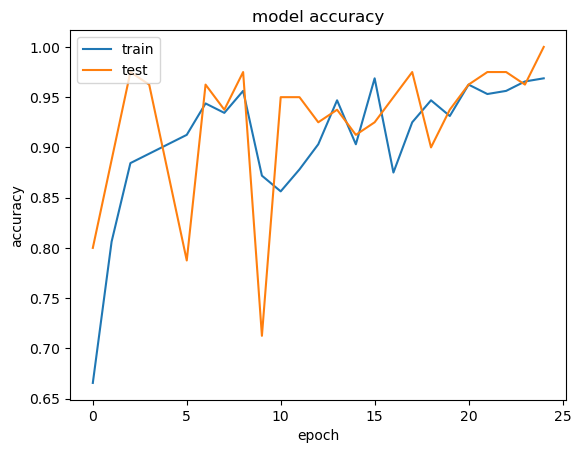

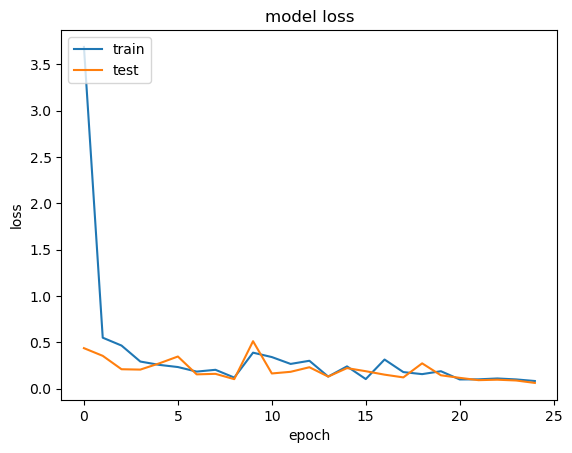

In [7]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend ([ 'train', 'test'], loc= 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend ([ 'train', 'test'], loc= 'upper left')
plt.show()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


4/4 [==============================] - 0s 7ms/step
[[35  1]
 [ 0 64]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.98      1.00      0.99        64

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

99.0
0.99


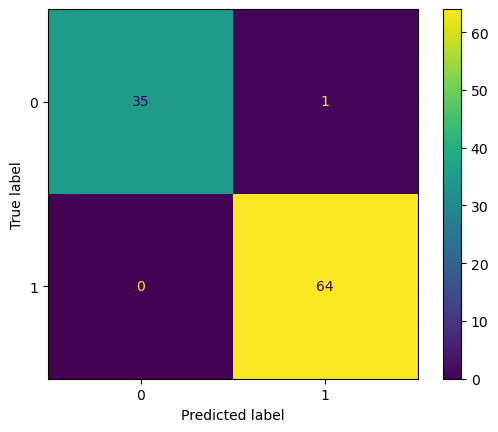

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score

from sklearnex import patch_sklearn
patch_sklearn()

Y_pred=model.predict(X_test)
Y_pred= np.round(Y_pred)

#print(Y_pred)

cm = confusion_matrix (Y_test,Y_pred)
print(cm)
print(classification_report (Y_test, Y_pred))
print(round((accuracy_score (Y_test, Y_pred)*100),2))
print(round (f1_score (Y_test, Y_pred, average='weighted'), 3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()